# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from pathlib import Path
from unityagents import UnityEnvironment
import numpy as np
import logging
import os
import pandas as pd

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="./Banana")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Build the RL-Library
The core classes and algorithms used to solve this project are packaged in a python module. The following 2 cells will first change the current directory to the root of the repository, then install the python package. 

Change Current Working Directory to the root of the repository.

In [4]:
cwd = os.path.abspath('')
os.chdir(Path(cwd).parents[1])
os.getcwd()

'/Users/quentincangelosi/Documents/5. Other/2. DataScience/github/RL-Library'

[OPTIONAL]: If you haven't already, install the package requirements.

In [5]:
!pip install -r requirements.txt

  Using cached https://files.pythonhosted.org/packages/63/f0/c2c11e34d43f657df8ae05be5fa991200a2ed576e3694244a9dc766c14c3/matplotlib-3.3.2-cp37-cp37m-macosx_10_9_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/bc/45/5118a05b0d61173e6eb12bc5804f0fbb6f196adb0a20e0b16efc2b8e98be/seaborn-0.11.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5e/c4/6c4fe722df5343c33226f0b4e0bb042e4dc13483228b4718baf286f86d87/certifi-2020.6.20-py2.py3-none-any.whl
  Found existing installation: certifi 2019.6.16
ERROR: Cannot uninstall 'certifi'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


Install the rl_library package.

**Important Note:** It seems that even though your jupyter notebook is running in an environment (conda) XYZ, the pip install command below might not install the package in the environment XYZ. Thus you might want to run this in a terminal at the root of the repository with the correct python environment activated.

In [6]:
!pip install -e .

Obtaining file:///Users/quentincangelosi/Documents/5.%20Other/2.%20DataScience/github/RL-Library
  Found existing installation: rl-library 0.0.1
    Uninstalling rl-library-0.0.1:
      Successfully uninstalled rl-library-0.0.1
  Running setup.py develop for rl-library


In [7]:
from rl_library.monitors import unity_monitor
from rl_library.agents import DQAgent

Revert current working directory to examples/navigation.

In [8]:
os.chdir(cwd)
os.getcwd()

'/Users/quentincangelosi/Documents/5. Other/2. DataScience/github/RL-Library/examples/navigation'

### 3. Important Input Parameters

The following are input parameters that can be changed to generate new solutions:

    - hidden_layer_sizes: List of hidden layers sizes for the Deep-Q-Network (a standard feed-forward fully connected neural network architecture)
    - options: List of options to improve the Deep Q Learning algorithm. Possible values:
        - "double-q-learning": to enhance Deep Q Learning into Double Deep Q Learning
        - "prioritized-replay": to enhance the experience replay into prioritized experience replay
    - mode: Enable training or testing phase
    - save_path: Where the results will be located

In [9]:
hidden_layer_sizes = [20, 15, 8]
options = ["double-q-learning"]     # ["double-q-learning", "prioritized-replay"]
mode = "train"                      # "train" or "test"
save_path = f"DDQN_" + "_".join([str(sz) for sz in hidden_layer_sizes])
os.makedirs(save_path, exist_ok=True)

Initiate a logger to record logs of the simulations.

In [10]:
# Logger
logger = logging.getLogger()
handler = logging.FileHandler(f"{save_path}/logs_navigation_{pd.Timestamp.utcnow().value}.log")
stream_handler = logging.StreamHandler()
logger.addHandler(handler)
logger.addHandler(stream_handler)

### 4. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [11]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
logger.info(f'Number of agents: {len(env_info.agents)}')

# number of actions
action_size = brain.vector_action_space_size
logger.info(f'Number of actions: {action_size}')

# examine the state space
state = env_info.vector_observations[0]
logger.info(f'States look like: {state}')
state_size = len(state)
logger.info(f'States have length: {state_size}')

INFO:root:Number of agents: 1
Number of agents: 1
INFO:root:Number of actions: 4
Number of actions: 4
INFO:root:States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
INFO:root:States have length: 37
States have length: 37


### 5. Train the Agent

In the following cell, the agent is going to be trained to solve the navigation problem. 
More information about the classes and functions used can be found in Report.md

INFO:root:Initialized model: Sequential(
  (fc0): Linear(in_features=37, out_features=20, bias=True)
  (relu0): ReLU()
  (fc1): Linear(in_features=20, out_features=15, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=15, out_features=8, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=8, out_features=4, bias=True)
  (softmax): Softmax(dim=1)
)
Initialized model: Sequential(
  (fc0): Linear(in_features=37, out_features=20, bias=True)
  (relu0): ReLU()
  (fc1): Linear(in_features=20, out_features=15, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=15, out_features=8, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=8, out_features=4, bias=True)
  (softmax): Softmax(dim=1)
)
INFO:root:Using Double Q-Learning.
Using Double Q-Learning.
/Users/quentincangelosi/Documents/5. Other/2. DataScience/github/RL-Library/rl_library/agents/dqn_agent.py:308: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lis

Episode 99	Average Score: 0.82, DQN Avg. Loss: 7.01e-03, Last Score: 2.00, eps: 0.618

Episode 100	Average Score: 0.82, DQN Avg. Loss: 7.53e-03, Last Score: 1.00
Episode 100	Average Score: 0.82, DQN Avg. Loss: 7.53e-03, Last Score: 1.00


Episode 199	Average Score: 1.64, DQN Avg. Loss: 9.62e-03, Last Score: 2.00, eps: 0.378

Episode 200	Average Score: 1.65, DQN Avg. Loss: 9.08e-03, Last Score: 2.00
Episode 200	Average Score: 1.65, DQN Avg. Loss: 9.08e-03, Last Score: 2.00


Episode 299	Average Score: 3.07, DQN Avg. Loss: 1.39e-02, Last Score: 4.00, eps: 0.223

Episode 300	Average Score: 3.06, DQN Avg. Loss: 1.48e-02, Last Score: 1.00
Episode 300	Average Score: 3.06, DQN Avg. Loss: 1.48e-02, Last Score: 1.00


Episode 399	Average Score: 3.57, DQN Avg. Loss: 1.56e-02, Last Score: -1.00, eps: 0.14

Episode 400	Average Score: 3.65, DQN Avg. Loss: 1.47e-02, Last Score: 9.00
Episode 400	Average Score: 3.65, DQN Avg. Loss: 1.47e-02, Last Score: 9.00


Episode 499	Average Score: 4.38, DQN Avg. Loss: 1.63e-02, Last Score: 6.00, eps: 0.088

Episode 500	Average Score: 4.37, DQN Avg. Loss: 1.75e-02, Last Score: 8.00
Episode 500	Average Score: 4.37, DQN Avg. Loss: 1.75e-02, Last Score: 8.00
INFO:root:
Saving model to DDQN_20_15_8

Saving model to DDQN_20_15_8


Episode 599	Average Score: 6.94, DQN Avg. Loss: 1.71e-02, Last Score: 5.00, eps: 0.055

Episode 600	Average Score: 6.92, DQN Avg. Loss: 1.64e-02, Last Score: 6.00
Episode 600	Average Score: 6.92, DQN Avg. Loss: 1.64e-02, Last Score: 6.00


Episode 699	Average Score: 9.66, DQN Avg. Loss: 1.94e-02, Last Score: 6.00, eps: 0.033

Episode 700	Average Score: 9.69, DQN Avg. Loss: 2.07e-02, Last Score: 9.00
Episode 700	Average Score: 9.69, DQN Avg. Loss: 2.07e-02, Last Score: 9.00


Episode 799	Average Score: 11.52, DQN Avg. Loss: 1.89e-02, Last Score: 12.00, eps: 0.02

Episode 800	Average Score: 11.53, DQN Avg. Loss: 2.09e-02, Last Score: 10.00
Episode 800	Average Score: 11.53, DQN Avg. Loss: 2.09e-02, Last Score: 10.00


Episode 899	Average Score: 12.76, DQN Avg. Loss: 1.91e-02, Last Score: 13.00, eps: 0.01

Episode 900	Average Score: 12.76, DQN Avg. Loss: 1.98e-02, Last Score: 10.00
Episode 900	Average Score: 12.76, DQN Avg. Loss: 1.98e-02, Last Score: 10.00


Episode 999	Average Score: 12.90, DQN Avg. Loss: 2.39e-02, Last Score: 12.00, eps: 0.01

Episode 1000	Average Score: 12.95, DQN Avg. Loss: 2.31e-02, Last Score: 15.00
Episode 1000	Average Score: 12.95, DQN Avg. Loss: 2.31e-02, Last Score: 15.00
INFO:root:
Saving model to DDQN_20_15_8

Saving model to DDQN_20_15_8


Episode 1057	Average Score: 13.47, DQN Avg. Loss: 2.37e-02, Last Score: 16.00, eps: 0.01

Environment solved in 1058 episodes!	Average Score: 13.53

Environment solved in 1058 episodes!	Average Score: 13.53


Episode 1099	Average Score: 14.01, DQN Avg. Loss: 2.22e-02, Last Score: 13.00, eps: 0.01

Episode 1100	Average Score: 14.06, DQN Avg. Loss: 2.52e-02, Last Score: 20.00
Episode 1100	Average Score: 14.06, DQN Avg. Loss: 2.52e-02, Last Score: 20.00


Episode 1199	Average Score: 15.11, DQN Avg. Loss: 2.37e-02, Last Score: 14.00, eps: 0.01

Episode 1200	Average Score: 15.08, DQN Avg. Loss: 2.43e-02, Last Score: 17.00
Episode 1200	Average Score: 15.08, DQN Avg. Loss: 2.43e-02, Last Score: 17.00


Episode 1299	Average Score: 14.70, DQN Avg. Loss: 2.31e-02, Last Score: 14.00, eps: 0.01

Episode 1300	Average Score: 14.68, DQN Avg. Loss: 2.46e-02, Last Score: 15.00
Episode 1300	Average Score: 14.68, DQN Avg. Loss: 2.46e-02, Last Score: 15.00


Episode 1399	Average Score: 14.91, DQN Avg. Loss: 2.47e-02, Last Score: 15.00, eps: 0.01

Episode 1400	Average Score: 14.89, DQN Avg. Loss: 2.51e-02, Last Score: 13.00
Episode 1400	Average Score: 14.89, DQN Avg. Loss: 2.51e-02, Last Score: 13.00


Episode 1499	Average Score: 14.42, DQN Avg. Loss: 2.29e-02, Last Score: 20.00, eps: 0.01

Episode 1500	Average Score: 14.46, DQN Avg. Loss: 2.33e-02, Last Score: 17.00
Episode 1500	Average Score: 14.46, DQN Avg. Loss: 2.33e-02, Last Score: 17.00
INFO:root:
Saving model to DDQN_20_15_8

Saving model to DDQN_20_15_8


Episode 1599	Average Score: 14.54, DQN Avg. Loss: 2.17e-02, Last Score: 15.00, eps: 0.01

Episode 1600	Average Score: 14.47, DQN Avg. Loss: 2.35e-02, Last Score: 10.00
Episode 1600	Average Score: 14.47, DQN Avg. Loss: 2.35e-02, Last Score: 10.00


Episode 1699	Average Score: 14.50, DQN Avg. Loss: 2.30e-02, Last Score: 17.00, eps: 0.01

Episode 1700	Average Score: 14.58, DQN Avg. Loss: 2.56e-02, Last Score: 18.00
Episode 1700	Average Score: 14.58, DQN Avg. Loss: 2.56e-02, Last Score: 18.00


Episode 1799	Average Score: 14.39, DQN Avg. Loss: 2.32e-02, Last Score: 10.00, eps: 0.01

Episode 1800	Average Score: 14.34, DQN Avg. Loss: 2.39e-02, Last Score: 13.00
Episode 1800	Average Score: 14.34, DQN Avg. Loss: 2.39e-02, Last Score: 13.00


Episode 1899	Average Score: 14.55, DQN Avg. Loss: 2.19e-02, Last Score: 13.00, eps: 0.01

Episode 1900	Average Score: 14.49, DQN Avg. Loss: 2.28e-02, Last Score: 7.00
Episode 1900	Average Score: 14.49, DQN Avg. Loss: 2.28e-02, Last Score: 7.00


Episode 1999	Average Score: 14.43, DQN Avg. Loss: 2.15e-02, Last Score: 16.00, eps: 0.01

Episode 2000	Average Score: 14.49, DQN Avg. Loss: 2.25e-02, Last Score: 13.00
Episode 2000	Average Score: 14.49, DQN Avg. Loss: 2.25e-02, Last Score: 13.00
INFO:root:
Saving model to DDQN_20_15_8

Saving model to DDQN_20_15_8


Episode 2000	Average Score: 14.49, DQN Avg. Loss: 2.25e-02, Last Score: 13.00, eps: 0.01

INFO:root:Elapsed Time: 0 days 14:43:51.947186
Elapsed Time: 0 days 14:43:51.947186
INFO:root:Average Score last 100 episodes: 14.49
Average Score last 100 episodes: 14.49


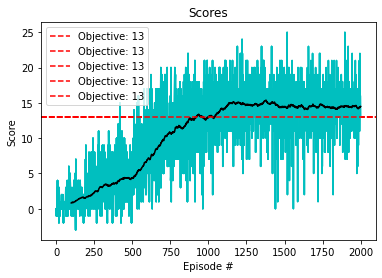

In [12]:
# Training
if mode == "train":
    agent = DQAgent(state_size=state_size, action_size=action_size,
                    hidden_layer_sizes=hidden_layer_sizes, options=options)

    scores = unity_monitor.run(env, agent, brain_name, save_every=500, save_path=save_path)
    logger.info("Average Score last 100 episodes: {}".format(np.mean(scores[-100:])))

Visualize scores

/Users/quentincangelosi/anaconda3/envs/rl/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

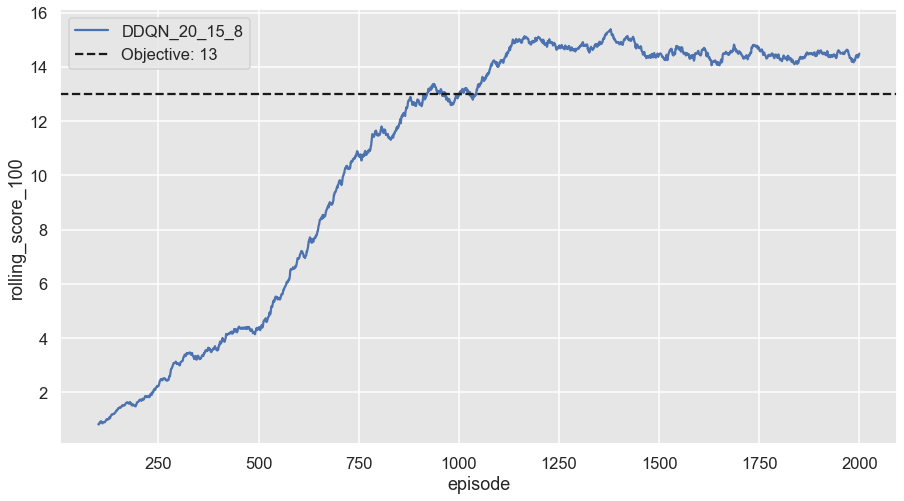

In [13]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sb
import pickle
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sb.set()
sb.set_style("darkgrid", {"axes.facecolor": ".9"})
sb.despine()
sb.set_context("talk")

# Let's compare different solutions!

solutions_path = [save_path,]
df = pd.DataFrame()
for path in solutions_path:
    fn = f"{path}/scores.pickle"
    if os.path.exists(fn):
        with open(fn, "rb") as f:
            scores = pickle.load(f)
    _df = pd.DataFrame({"score": scores})
    _df["name"] = path
    _df["episode"] = _df.index + 1
    _df["rolling_score_100"] = _df["score"].rolling(100).mean()
    df = df.append(_df, ignore_index=True)

plt.figure(figsize=(15, 8))
sb.lineplot("episode", "rolling_score_100", hue="name", data=df)
plt.axhline(13, c="k", ls="--", label="Objective: 13")
plt.legend()
plt.show()

### 6. Test the Agent

INFO:root:Loading Agent from DDQN_20_15_8
Loading Agent from DDQN_20_15_8
INFO:root:Initialized model: Sequential(
  (fc0): Linear(in_features=37, out_features=20, bias=True)
  (relu0): ReLU()
  (fc1): Linear(in_features=20, out_features=15, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=15, out_features=8, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=8, out_features=4, bias=True)
  (softmax): Softmax(dim=1)
)
Initialized model: Sequential(
  (fc0): Linear(in_features=37, out_features=20, bias=True)
  (relu0): ReLU()
  (fc1): Linear(in_features=20, out_features=15, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=15, out_features=8, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=8, out_features=4, bias=True)
  (softmax): Softmax(dim=1)
)


Episode 99	Average Score: 14.41, DQN Avg. Loss: inf, Last Score: 6.00, eps: 0.000

Episode 100	Average Score: 14.38, DQN Avg. Loss: inf, Last Score: 11.00
Episode 100	Average Score: 14.38, DQN Avg. Loss: inf, Last Score: 11.00


Episode 100	Average Score: 14.38, DQN Avg. Loss: inf, Last Score: 11.00, eps: 0.00

INFO:root:Elapsed Time: 0 days 00:50:02.530674
Elapsed Time: 0 days 00:50:02.530674
INFO:root:Test Score over 100 episodes: 14.38
Test Score over 100 episodes: 14.38


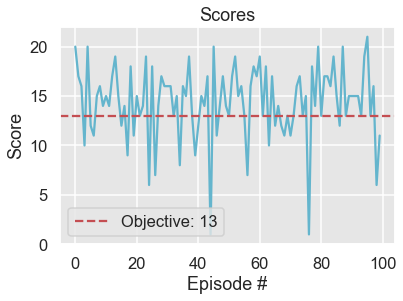

In [14]:
# Testing
mode = "test"
agent = DQAgent.load(filepath=save_path, mode="test")
scores = unity_monitor.run(env, agent, brain_name, n_episodes=100, length_episode=1e6, mode="test")
logger.info(f"Test Score over {len(scores)} episodes: {np.mean(scores)}")

In [15]:
# When finished, you can close the environment.
logger.info("Closing...")
env.close()

INFO:root:Closing...
Closing...
